In [3]:
#check this
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load and preprocess data
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature
threshold_temp = 30  # Example threshold for classifying a day as heatwave
df['Heatwave'] = np.where(df['tmax'] > threshold_temp, 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')

C:\Users\anirudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6384 - loss: 0.6021 - val_accuracy: 0.8613 - val_loss: 0.3672
Epoch 2/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9105 - loss: 0.2867 - val_accuracy: 0.9596 - val_loss: 0.1510
Epoch 3/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1485 - val_accuracy: 0.9616 - val_loss: 0.1151
Epoch 4/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9533 - loss: 0.1239 - val_accuracy: 0.9663 - val_loss: 0.0984
Epoch 5/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9581 - loss: 0.1095 - val_accuracy: 0.9703 - val_loss: 0.0879
Epoch 6/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.0948 - val_accuracy: 0.9719 - val_loss: 0.0774
Epoch 7/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.0851 - val_accuracy: 0.9750 - val_loss: 0.0684
Epoch 8/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0758 - val_accu

KeyboardInterrupt: 

Epoch 1/100


C:\Users\anirudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7472 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7408 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7425 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7445 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7465 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7377 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7431 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7426 - loss: nan - val_accuracy: 0.7428 - val_loss: nan
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━

C:\Users\anirudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anirudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anirudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classi

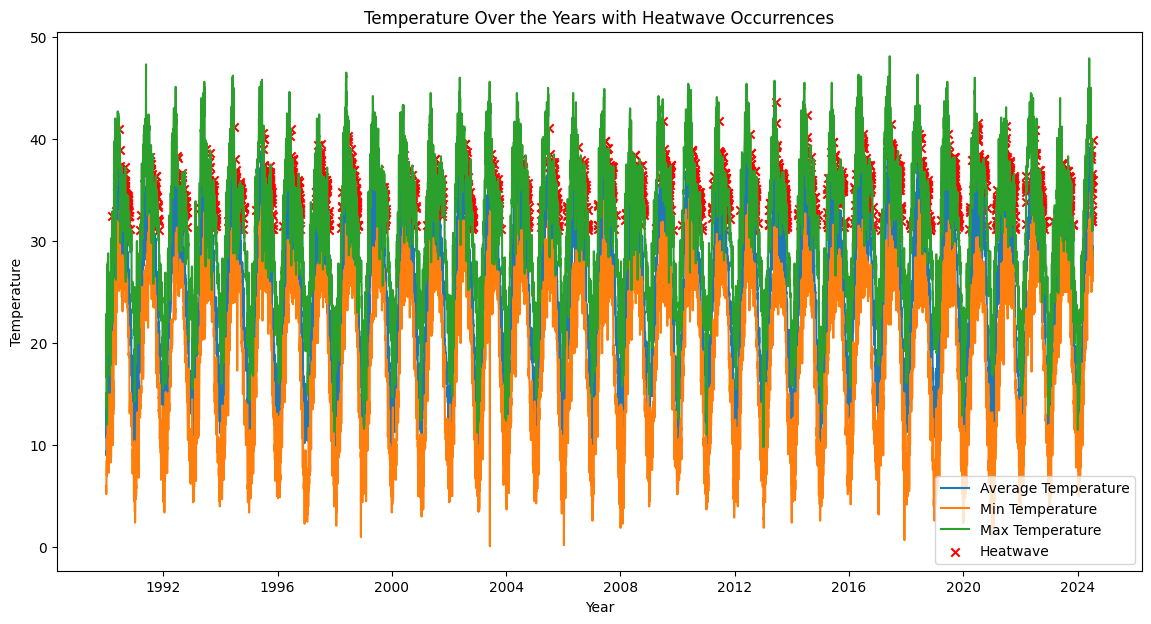

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data (assuming '12delhi_cleaned.csv' contains the dataset)
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature and humidity
threshold_temp = 31  # Example threshold for temperature to classify as heatwave
threshold_humid = 60  # Example threshold for humidity to classify as heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > threshold_temp and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'prcp', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10000, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    avg_humid = df['humid'].mean()  # Include average humidity
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')
